# HEART_FAILURE_PREDICTION_DATASET -> ANALYSIS:

#                               DATA DICTIONARY:
# Age: age of the patient [years]
# Sex: sex of the patient [M: Male, F: Female]
# ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal # # Pain, ASY: Asymptomatic]
# RestingBP: resting blood pressure [mm Hg]
# Cholesterol: serum cholesterol [mm/dl]
# FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
# RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality # (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or # definite left ventricular hypertrophy by Estes' criteria]
# MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
# ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
# Oldpeak: oldpeak = ST [Numeric value measured in depression]
# ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
# HeartDisease: output class [1: heart disease, 0: Normal]

# CREATE LIBRARIES:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

# IMPORT IMAGE:

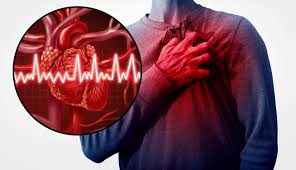

In [2]:
from IPython.display import Image
Image(filename = 'images 5.png', width = 500 , height = 500)

# READ DATA:

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.shape

(918, 12)

In [5]:
df.size

11016

In [6]:
print('### DataFrame info ###')
df.info()

### DataFrame info ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [31]:
df.nunique()

Age                 50
Sex                  2
ChestPainType        4
RestingBP           67
Cholesterol        222
FastingBS            2
RestingECG           3
MaxHR              119
ExerciseAngina       2
Oldpeak             53
ST_Slope             3
HeartDisease         2
ExcerciseAngina      2
AgeGroup             6
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [9]:
df.info

<bound method DataFrame.info of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisea

In [32]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [11]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [12]:
def get_unique_values(data):
    for column in data.columns:
        unique_values = data[column].unique()
        print(f"column: {column}")
        print(f"Unique Values: {unique_values}")
        print("_" * 100)

In [13]:
get_unique_values(df)
df = df.copy()

column: Age
Unique Values: [40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
____________________________________________________________________________________________________
column: Sex
Unique Values: ['M' 'F']
____________________________________________________________________________________________________
column: ChestPainType
Unique Values: ['ATA' 'NAP' 'ASY' 'TA']
____________________________________________________________________________________________________
column: RestingBP
Unique Values: [140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
____________________________________________________________________________________________________
column: Ch

In [14]:
df.head(5). transpose()

,0,1,2,3,4
Age,40,49,37,48,54
Sex,M,F,M,F,M
ChestPainType,ATA,NAP,ATA,ASY,NAP
RestingBP,140,160,130,138,150
Cholesterol,289,180,283,214,195
FastingBS,0,0,0,0,0
RestingECG,Normal,Normal,ST,Normal,Normal
MaxHR,172,156,98,108,122
ExerciseAngina,N,N,N,Y,N
Oldpeak,0.0,1.0,0.0,1.5,0.0


<Axes: >

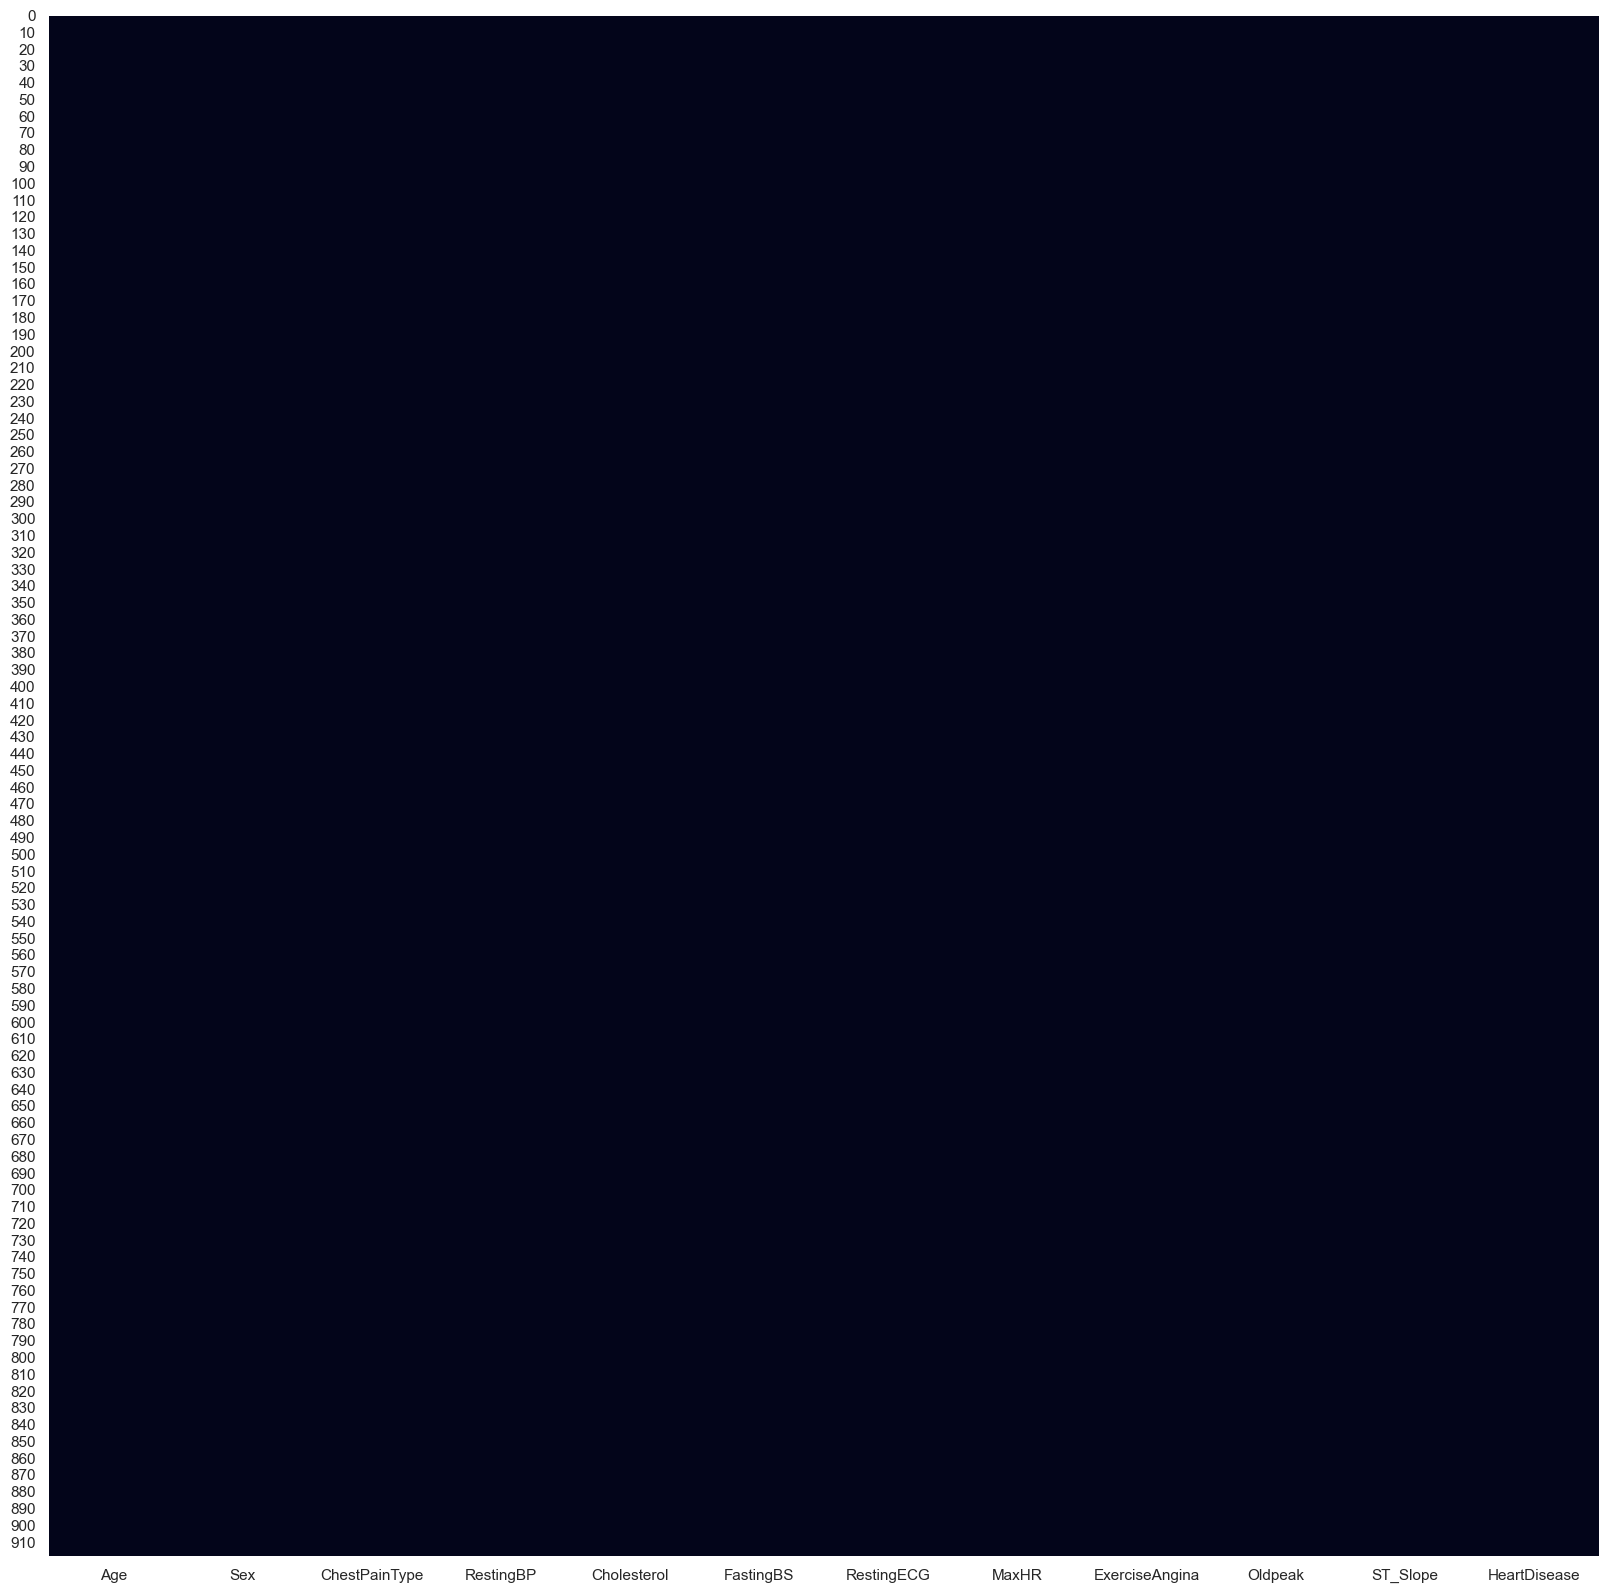

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull(), cbar= False)

In [16]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# NUMERIC FEATURE:

In [17]:
df.iloc[:, :-1].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["mean",], color='green')

,count,mean,std,min,25%,50%,75%,max
Cholesterol,918.000000,198.799564,109.384145,0.000000,173.250000,223.000000,267.000000,603.000000
MaxHR,918.000000,136.809368,25.460334,60.000000,120.000000,138.000000,156.000000,202.000000
RestingBP,918.000000,132.396514,18.514154,0.000000,120.000000,130.000000,140.000000,200.000000
Age,918.000000,53.510893,9.432617,28.000000,47.000000,54.000000,60.000000,77.000000
Oldpeak,918.000000,0.887364,1.066570,-2.600000,0.000000,0.600000,1.500000,6.200000
FastingBS,918.000000,0.233115,0.423046,0.000000,0.000000,0.000000,0.000000,1.000000


# CLEAN CATEGORICAL LABELS:

In [18]:
df['ChestPainType'] = df['ChestPainType'].replace({
                         'TA': 'Typical Angina',
                         'ATA': 'Atypical Angina',
                         'NAP': 'Non-Anginal Pain',
                         'ASY': 'Asympotomatic'})
df['ExcerciseAngina'] = df['ExerciseAngina'].replace({'Y': 'Yes', 'N':'No'})

# SOME VISUALS OF HEART DISEASES:

AttributeError: 'numpy.int64' object has no attribute 'startswith'

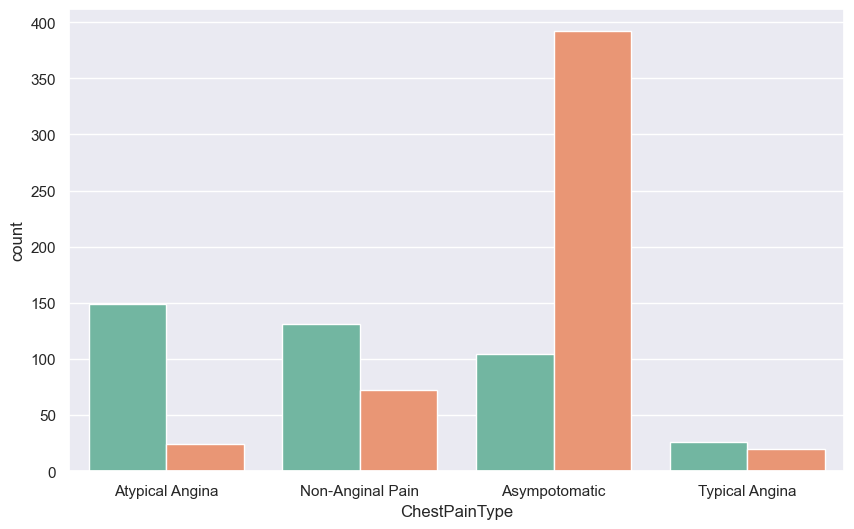

In [19]:
#   Plot ChestPain Type vs HeartDisease.
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='ChestPainType' , hue='HeartDisease', palette='Set2')
plt.title('Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Number of People')
plt.legend(title='Heart Disease', labels=['No'])
plt.title('Chest Pain Type vs Heart Disease')
plt.show()

In [35]:
df['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

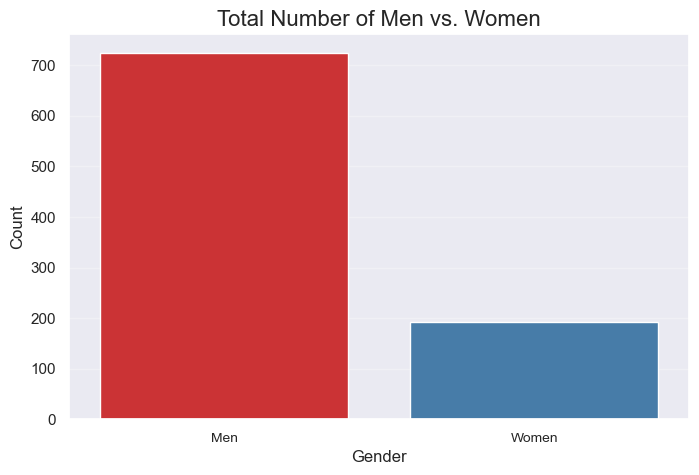

In [20]:
gender = df['Sex'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=gender.index, y=gender.values, palette='Set1')

plt.title('Total Number of Men vs. Women', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Men', 'Women'], fontsize=10)
plt.grid(axis='y', alpha=0.3)

plt.show()

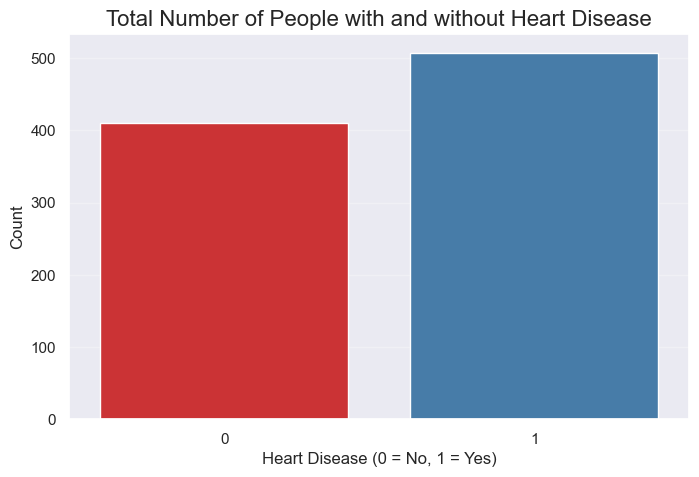

In [21]:
peopleHearts = df['HeartDisease'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=peopleHearts.index, y=peopleHearts.values, palette='Set1')

plt.title('Total Number of People with and without Heart Disease', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.grid(axis='y', alpha=0.3)

plt.show()

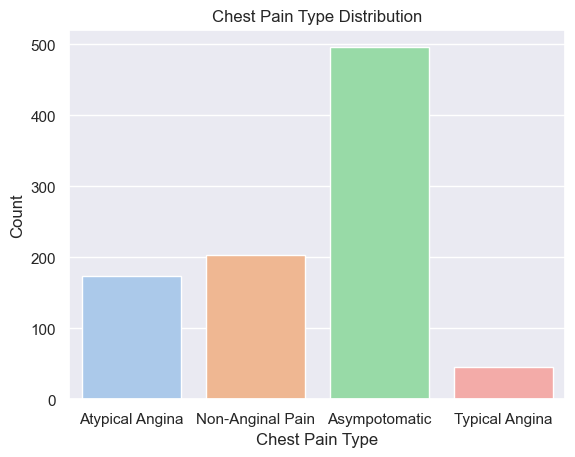

In [24]:
sns.countplot(data=df, x='ChestPainType', palette='pastel')
plt.title('Chest Pain Type Distribution')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='HeartDisease', ylabel='count'>

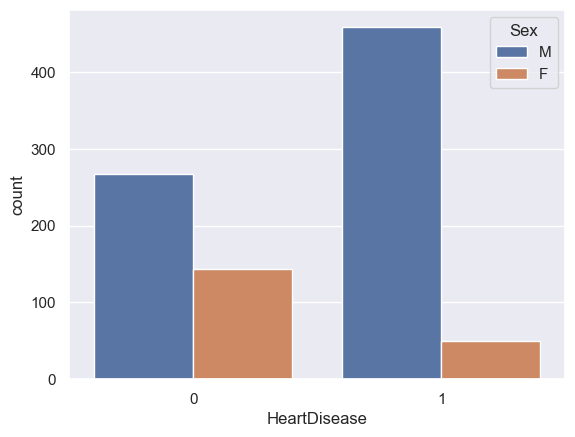

In [25]:
sns.countplot(data=df,x='HeartDisease',hue='Sex')

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'FastingBS'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>],
       [<Axes: title={'center': 'HeartDisease'}>, <Axes: >, <Axes: >]],
      dtype=object)

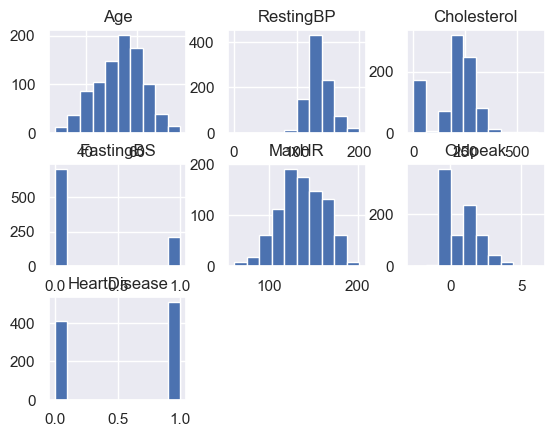

In [29]:
df.hist()

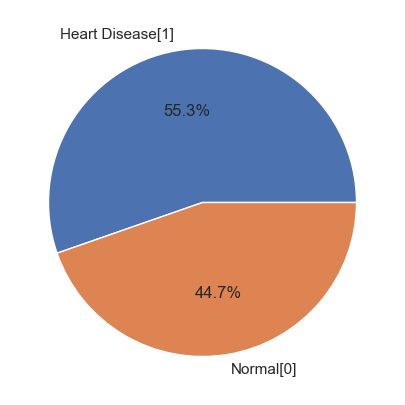

In [30]:
plt.figure(figsize=(10,5))
plt.pie(df['HeartDisease'].value_counts(), labels=['Heart Disease[1]', 'Normal[0]'], autopct='%1.1f%%')
plt.show()

In [37]:
Categorical = df.select_dtypes(include=['object'])
Numerical = df.select_dtypes(include=['int64', 'float64'])
print('Categorical features:\n', Categorical)
print('Numerical features:\n', Numerical)

Categorical features:
     Sex     ChestPainType RestingECG ExerciseAngina ST_Slope ExcerciseAngina
0     M   Atypical Angina     Normal              N       Up              No
1     F  Non-Anginal Pain     Normal              N     Flat              No
2     M   Atypical Angina         ST              N       Up              No
3     F     Asympotomatic     Normal              Y     Flat             Yes
4     M  Non-Anginal Pain     Normal              N       Up              No
..   ..               ...        ...            ...      ...             ...
913   M    Typical Angina     Normal              N     Flat              No
914   M     Asympotomatic     Normal              N     Flat              No
915   M     Asympotomatic     Normal              Y     Flat             Yes
916   F   Atypical Angina        LVH              N     Flat              No
917   M  Non-Anginal Pain     Normal              N       Up              No

[918 rows x 6 columns]
Numerical features:
      Age

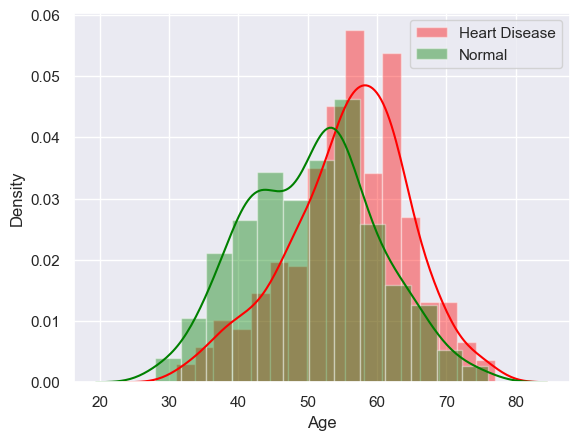

In [41]:
sns.distplot(df['Age'][df['HeartDisease'] == 1], kde=True, color='red', label='Heart Disease')
sns.distplot(df['Age'][df['HeartDisease'] == 0], kde=True, color='green', label='Normal')
plt.legend()

#   MODEL TEST:

In [42]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report

In [43]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ExcerciseAngina,AgeGroup
0,40,M,Atypical Angina,140,289,0,Normal,172,N,0.0,Up,0,No,40-50
1,49,F,Non-Anginal Pain,160,180,0,Normal,156,N,1.0,Flat,1,No,40-50
2,37,M,Atypical Angina,130,283,0,ST,98,N,0.0,Up,0,No,30-40
3,48,F,Asympotomatic,138,214,0,Normal,108,Y,1.5,Flat,1,Yes,40-50
4,54,M,Non-Anginal Pain,150,195,0,Normal,122,N,0.0,Up,0,No,50-60


In [50]:
numerical_features = df.select_dtypes(include=['int64', 'float64'])
# apply label encoding
numerical_features = numerical_features.apply(LabelEncoder().fit_transform)
numerical_features.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,12,41,147,0,98,10,0
1,21,55,40,0,82,20,1
2,9,31,141,0,25,10,0
3,20,39,72,0,34,25,1
4,26,49,53,0,48,10,0


In [51]:
categorical_features = df.select_dtypes(include=['object'])
# apply get_dummies encoding
categorical_features = pd.get_dummies(categorical_features)
categorical_features.head()

,Sex_F,Sex_M,ChestPainType_Asympotomatic,ChestPainType_Atypical Angina,ChestPainType_Non-Anginal Pain,ChestPainType_Typical Angina,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,ExcerciseAngina_No,ExcerciseAngina_Yes
0,False,True,False,True,False,False,False,True,False,True,False,False,False,True,True,False
1,True,False,False,False,True,False,False,True,False,True,False,False,True,False,True,False
2,False,True,False,True,False,False,False,False,True,True,False,False,False,True,True,False
3,True,False,True,False,False,False,False,True,False,False,True,False,True,False,False,True
4,False,True,False,False,True,False,False,True,False,True,False,False,False,True,True,False


In [52]:
combined = pd.concat([numerical_features, categorical_features], axis=1)
combined.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_Asympotomatic,...,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,ExcerciseAngina_No,ExcerciseAngina_Yes
0,12,41,147,0,98,10,0,False,True,False,...,False,True,False,True,False,False,False,True,True,False
1,21,55,40,0,82,20,1,True,False,False,...,False,True,False,True,False,False,True,False,True,False
2,9,31,141,0,25,10,0,False,True,False,...,False,False,True,True,False,False,False,True,True,False
3,20,39,72,0,34,25,1,True,False,True,...,False,True,False,False,True,False,True,False,False,True
4,26,49,53,0,48,10,0,False,True,False,...,False,True,False,True,False,False,False,True,True,False


In [53]:
X = combined.drop(['HeartDisease'], axis=1)
y = combined['HeartDisease']

In [54]:
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_Asympotomatic,ChestPainType_Atypical Angina,...,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,ExcerciseAngina_No,ExcerciseAngina_Yes
0,12,41,147,0,98,10,False,True,False,True,...,False,True,False,True,False,False,False,True,True,False
1,21,55,40,0,82,20,True,False,False,False,...,False,True,False,True,False,False,True,False,True,False
2,9,31,141,0,25,10,False,True,False,True,...,False,False,True,True,False,False,False,True,True,False
3,20,39,72,0,34,25,True,False,True,False,...,False,True,False,False,True,False,True,False,False,True
4,26,49,53,0,48,10,False,True,False,False,...,False,True,False,True,False,False,False,True,True,False


In [55]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
X_train.shape

(734, 22)

In [58]:
X_test.shape

(184, 22)

In [59]:
scaler = StandardScaler()

In [60]:
scaler.fit(X)

StandardScaler()

In [61]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
X_train[:5]

array([[-1.22099397, -0.77353194,  0.27864511,  1.81375843,  2.12882651,
        -0.07819395, -0.51595242,  0.51595242, -1.08413811, -0.48188667,
         1.87674385, -0.22967867, -0.50747832,  0.81427482, -0.49044933,
         0.8235563 , -0.8235563 ,  3.68394199, -1.00218103, -0.86905588,
         0.8235563 , -0.8235563 ],
       [-1.85743145, -0.13482308, -0.24936678, -0.55134134,  1.64701621,
        -0.87246276, -0.51595242,  0.51595242, -1.08413811, -0.48188667,
         1.87674385, -0.22967867, -0.50747832,  0.81427482, -0.49044933,
         0.8235563 , -0.8235563 , -0.27144836, -1.00218103,  1.15067399,
         0.8235563 , -0.8235563 ],
       [ 0.2640268 ,  1.14259465, -0.18123621,  1.81375843, -0.48097929,
         0.12037326, -0.51595242,  0.51595242,  0.9223917 , -0.48188667,
        -0.53283777, -0.22967867, -0.50747832,  0.81427482, -0.49044933,
        -1.21424608,  1.21424608, -0.27144836,  0.99782372, -0.86905588,
        -1.21424608,  1.21424608],
       [-1.75135854

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
parameters={'n_neighbors':[3,5,11,19],
           'weights':['uniform','distance'],
           'metric':['minikowski','manhattan']}

In [65]:
clf=GridSearchCV(KNeighborsClassifier(), parameters, cv=3, verbose=1, n_jobs=-1)

In [66]:
clf.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minikowski', 'manhattan'],
                         'n_neighbors': [3, 5, 11, 19],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [67]:
clf.best_score_

0.8650775064124011

In [69]:
clf.best_params_

{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}

In [70]:
clf=KNeighborsClassifier(metric='manhattan', n_neighbors=11,weights='distance')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [71]:
confusion_matrix(y_test, y_pred)

array([[64, 13],
       [15, 92]], dtype=int64)

In [72]:
accuracy_score(y_test,y_pred)

0.8478260869565217

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        77
           1       0.88      0.86      0.87       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.85      0.85       184



<Axes: >

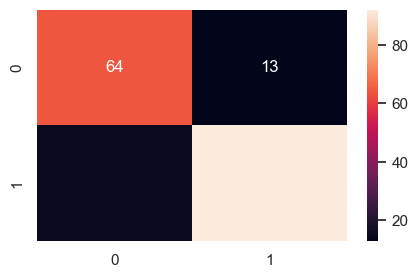

In [74]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True)

# CONCLUSION:
#   Heart failure is a chronic condition that occurs when the heart is unable to pump blood effectively. It can be caused by a number of diseases, including hypertension and coronary artery disease. Heart failure is a leading cause of death and illness worldwide. 